In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/card_transdata.csv')

# Check for missing values
print(data.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [8]:
# Data Exploration
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784     

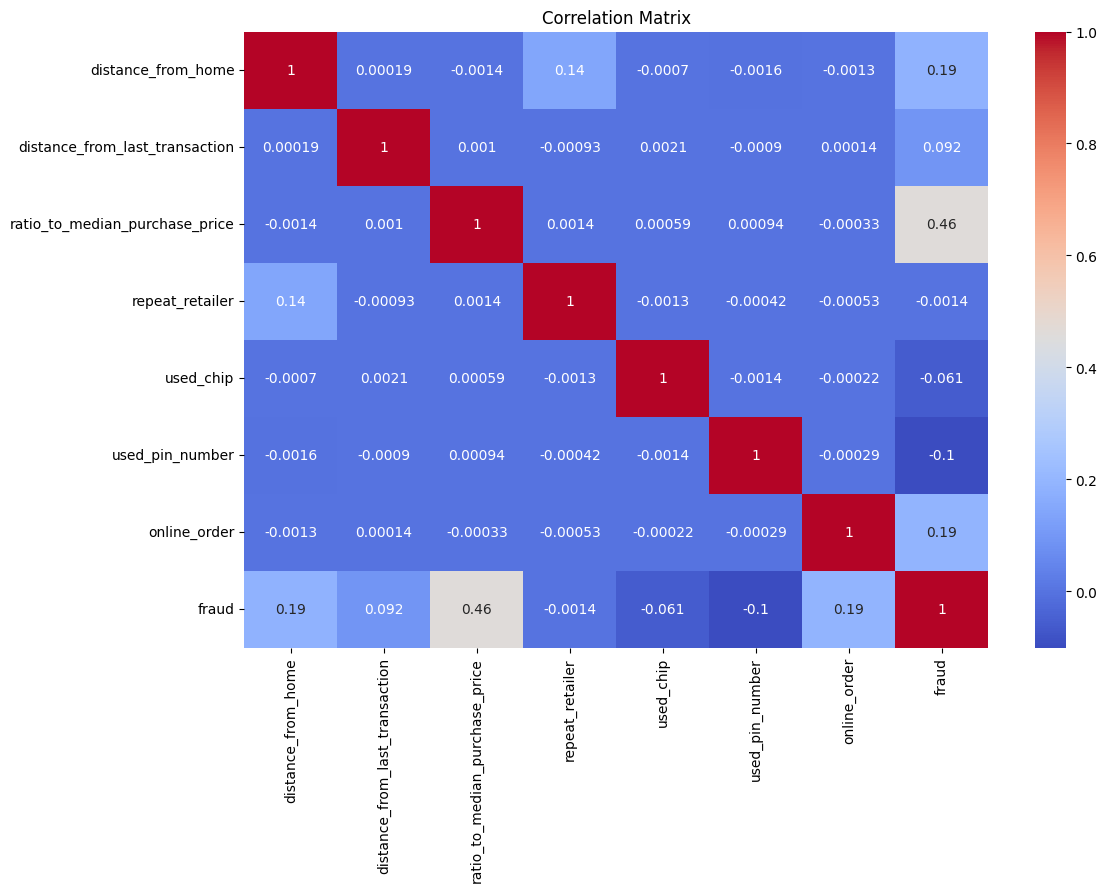

In [9]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


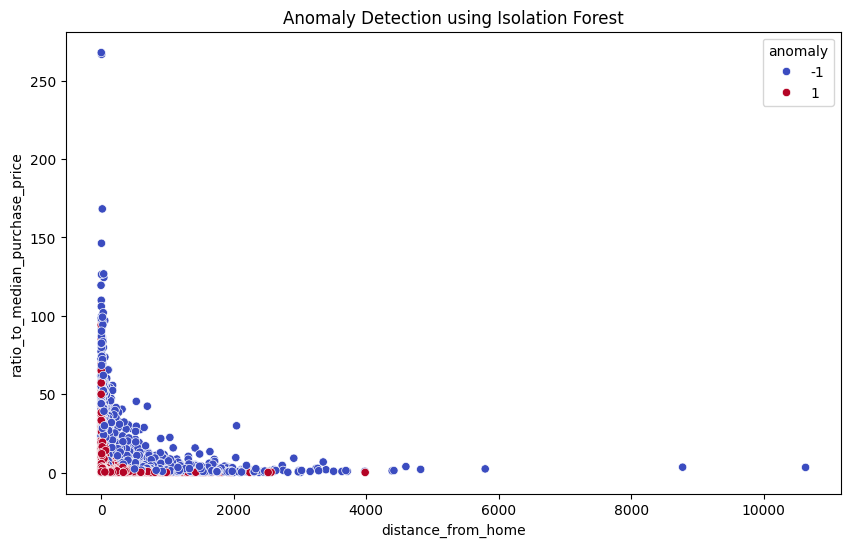

In [11]:
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X)

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_home', y='ratio_to_median_purchase_price', hue='anomaly', data=data, palette='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.show()


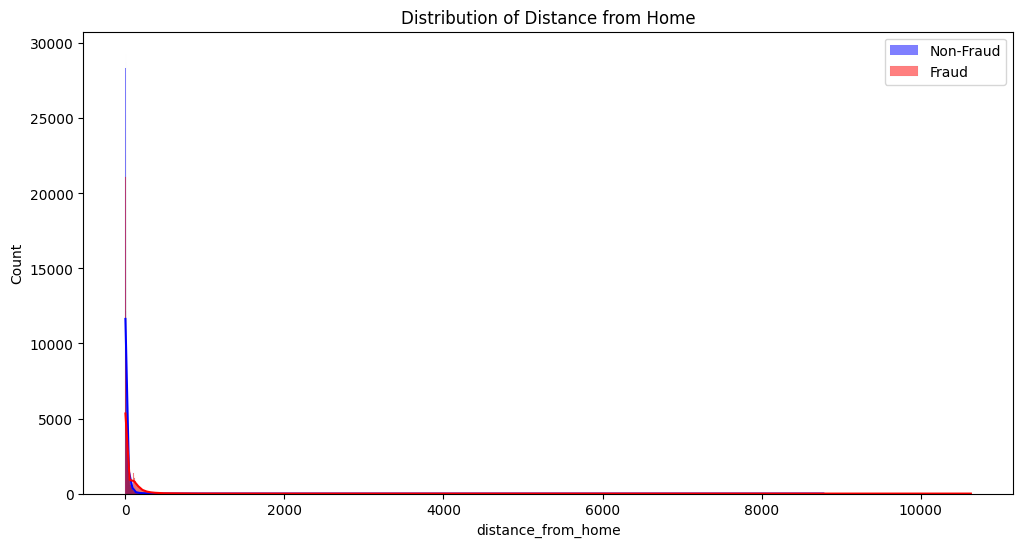

In [4]:
# Data Visualization
# Visualizing distances
plt.figure(figsize=(12, 6))
sns.histplot(data[data['fraud'] == 0]['distance_from_home'], color='blue', label='Non-Fraud', kde=True)
sns.histplot(data[data['fraud'] == 1]['distance_from_home'], color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Distribution of Distance from Home')
plt.show()

In [12]:
# Feature Engineering
selected_features = ['ratio_to_median_purchase_price', 'distance_from_home', 'online_order']
X = data[selected_features]
y = data['fraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    273871
         1.0       0.80      0.45      0.58     26129

    accuracy                           0.94    300000
   macro avg       0.88      0.72      0.77    300000
weighted avg       0.94      0.94      0.94    300000

[[270997   2874]
 [ 14334  11795]]


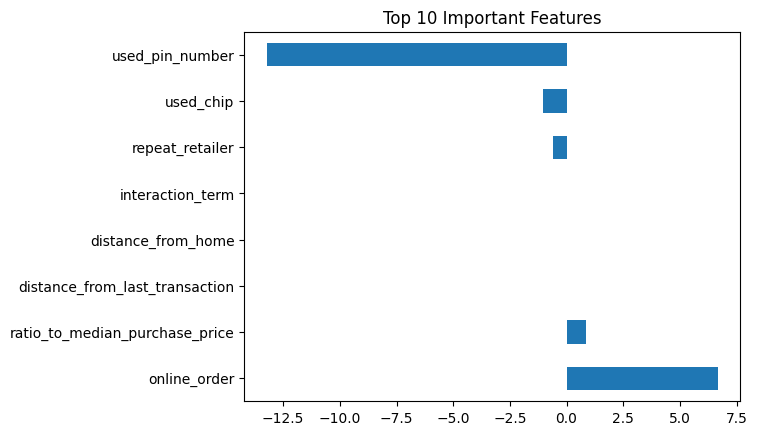

In [6]:
# Feature Importance - impact of each feature on predicting fraud
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()